# Modelo 9 - Boosting

### 1. Introdução

O boosting é uma estratégia muito usada em diversos algoritmos famosos, como o XGBoost e o NGBoos, sendo de vital importância seu entendimento.

### 2. Introdução teórica

No bagging, temos o uso de vários modelos fracos, árvores de decisão no caso das Random Forests, sendo usados paralelamente com amostras dos dados totais e das features. Ao final, ele faz uma média ou moda de todos os resultados obtidos para gerar um resultado melhor.

Já o boosting, consiste em o uso de modelos fracos sucessivamente, árvores de decisão no caso do Gradient Boost, em que cada um recebe o output do anterior, tentando a cada um melhorar o resultado. Em termos mais técnicos, cada previsão usa um modelo fraco para não ocorrer overfitting, com alto viés e baixa variância, e a cada modelo atualiza-se a previsão de modo a diminuir o viés e aumentar a variância.Isso é feito adicionando-se uma função para prever resíduos. O XGBoost é uma versão mais otimizada e robusta do Gradient Boosting, mais sobre ele é possível ver na referência 1.

No Gradient Boosting, temos os seguintes parâmetros:

n_estimators - número de passos a serem dados pelo boosting. default=100

max_depth - o número máximo de folhas. default=3

min_sample_split - número mínimo de amostra para dividir em folhas. default=2

learning_rate - para a contribuição de cada árvore. default=0.1

loss - função de otimização a ser usada entre {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}. default='squared_error'

### 3. Uso de Random Forest, Gradient Boost e XGBoost

Primeiro, importarei para nossa atividade final, o dataset mais icônico

In [48]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor

In [27]:
df = sns.load_dataset('penguins')
df = df.dropna()


encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(df[["species"]])
df_species = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(["species"]), index=df.index)
island_encoded = encoder.fit_transform(df[["island"]])
df_island = pd.DataFrame(island_encoded, columns=encoder.get_feature_names_out(["island"]), index=df.index)
sex_encoded = encoder.fit_transform(df[["sex"]])
df_sex = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(["sex"]), index=df.index)

df = pd.concat([df.drop(columns=["species", "island", "sex"]), df_species, df_island, df_sex], axis=1)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
340,46.8,14.3,215.0,4850.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
341,50.4,15.7,222.0,5750.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
342,45.2,14.8,212.0,5200.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


Teremos como target a massa:

In [50]:
X = df.drop("body_mass_g", axis=1)
y = df["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)
prev = []

Agora, treinemos os modelos. Farei a comparação sem parâmetro, para evitar sorte/azar.

In [ ]:
dr = DummyRegressor()
dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)
prev.append(RMSE)

794.4980894604942


In [52]:
rf = RandomForestRegressor(random_state=27)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)
prev.append(RMSE)

337.99777289990254


In [53]:
gb = GradientBoostingRegressor(random_state=27)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)
prev.append(RMSE)

313.47979446007645


In [54]:
xgb = XGBRegressor(random_state=27)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)
prev.append(RMSE)

377.3388524478549


Plotando agora:

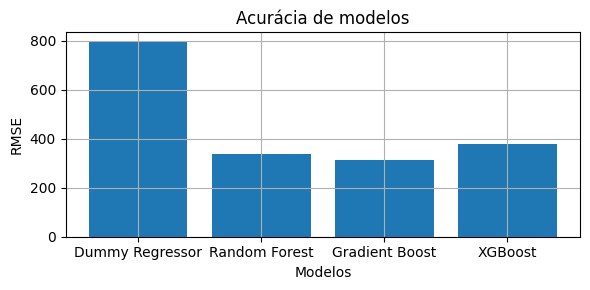

In [55]:
plt.figure(figsize=(6, 3))
plt.bar(["Dummy Regressor", "Random Forest", "Gradient Boost", "XGBoost"], prev)
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('Acurácia de modelos')
plt.tight_layout()
plt.grid(True)
plt.show()

Vemos que nesse caso, o Gradient Boost conseguiu o melhor resultado, superando significativamente o desempenho da random forest. O XGBoost não conseguiu performar como o esperado neste caso e a Random Forest foi intermediária entre os dois.

Logo, o boosting se trata de uma técnica com muito potencial, sendo uma alternativa muito interessante ao bagging.

### Referências:



Silveira, M. P. V. XGBoost. 2025. Acesso em: 06 de nov. de 2025.

Izbicki and dos Santos - 2020 - Aprendizado de máquina.pdf

CHEN, T.; GUESTRIN, C. XGBoost: Model Structure. 2023. Disponível em: https://xgboost.readthedocs.io/en/stable/tutorials/model.html. Acesso em: 03 de nov. de 2025.

IBM. XGBoost: conceitos e aplicações. IBM Think Topics, 2023. Disponível em: https://www.ibm.com/br-pt/think/topics/xgboost. Acesso em: 03 de nov. de 2025.